
Model of "A Programmable Heterogeneous Microprocessor Based on Bit-Scalable
In-Memory Computing", JSSC 2020
--------------------------------------------------------------------------------

Paper by Hongyang Jia, Hossein Valavi, Yinqi Tang, Jintao Zhang, and Naveen
Verma

## Description of The Macro

This macro partitions a large SRAM array into a 4x4 grid of subarrays that may
be indepently power gated. Additionally, it connects every group of three
columns to reuse outputs rather than inputs.

Inputs and outputs are both sliced into 1b slices, and the macro may sum
the results of multiple slices to produce a final output using
variable-precision inputs and weights.

Some of the important variables for jia_jssc_2020:

- *ARRAY_WORDLINES*: 768 rows in the array
- *ARRAY_BITLINES*: 768 columns in the array
- *ARRAY_PARALLEL_INPUTS*: 2304 input slice(s) consumed in each cycle.
- *ARRAY_PARALLEL_WEIGHTS*: 589824 weights slice(s) used for computation in each cycle.
- *ARRAY_PARALLEL_OUTPUTS*: 256 output(s) produced in each cycle.
- *TECHNOLOGY*: 65 nm
- *ADC_RESOLUTION*: 8 bit(s)
- *DAC_RESOLUTION*: 1 bit(s)
- *N_ADC_PER_BANK*: 256 ADC(s)
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 8 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *BITS_PER_CELL*: 1 bit(s)
- *CIM_UNIT_WIDTH_CELLS*: 1 adjacent cell(s) in a wordline store bit(s) in one weight slice and process one input & output slice together
- *CIM_UNIT_DEPTH_CELLS*: 1 adjacent cell(s) in a bitline operate in separate cycles
- *CELL_CONFIG*: None 
- *GLOBAL_CYCLE_SECONDS*: 1.35e-06 clock period

### Macro Level

- **Input Path**: Inputs are passed through zero gating before being
  XNOR-encoded and sent to row drivers. Row drivers support 1b input
  slices, so N-bit inputs are processed in N+1 cycles (XNOR adds an extra bit).
- **Weight Path**: Weight drivers are used to rewrite weights in the array.
- **Output Path**: Column drivers activate array columns to read analog outputs,
  which are then converted to digital using an 8b ADC. After the ADC,
  outputs are accumulated in a shift-add that sums output results across
  different input and weight slices. Finally, an output datapath performs
  quantization and activation functions on the outputs.

Next, there are four column groups in the macro, and each column group contains
64 column subgroups. Column groups may be independently power gated. Inputs are
reused between column groups and column subgroups.

### Column Subgroup Level 
 
There are 3 folded columns in a column subgroup. Folded columns, unlike standard
columns, reuse outputs rather than inputs. Beyond this, there are no additional
components in a column subgroup.

### Folded Column Level

- *Input Path*: Each input is passed directly to a row group in the folded
  column.
- *Weight Path*: A column bandwidth limiter sets the read and write bandwidth of
  each array column. Each weight is then passed to a row in the column.
- *Output Path*: A column bandwidth limiter sets the read and write bandwidth of
  each array column. One output is reused between rows in the column.

Inside each folded column, four row groups of 64 rows each reuse outputs. Row
groups may be independently power gated.

### Row Level

Each row contains a CiM unit that is composed of a SRAM cell and a capacitor to
perform analog MAC operations. The CiM unit uses a 1x1x8 (1b input slice x
1b weight slice x 8b output) virtualized MAC unit to compute the MAC
operation.


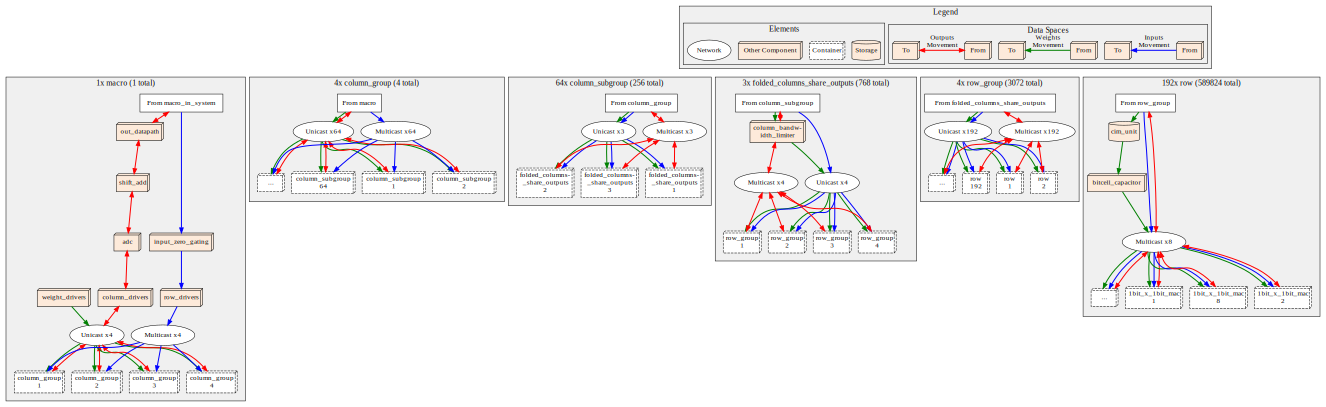

In [1]:
from _tests import scripts
from scripts.notebook_utils import *

IGNORE = ["system", "macro_in_system", "1bit_x_1bit_mac"]
display_markdown(
    f"""
Model of "A Programmable Heterogeneous Microprocessor Based on Bit-Scalable
In-Memory Computing", JSSC 2020
--------------------------------------------------------------------------------

Paper by Hongyang Jia, Hossein Valavi, Yinqi Tang, Jintao Zhang, and Naveen
Verma

## Description of The Macro

This macro partitions a large SRAM array into a 4x4 grid of subarrays that may
be indepently power gated. Additionally, it connects every group of three
columns to reuse outputs rather than inputs.

Inputs and outputs are both sliced into 1b slices, and the macro may sum
the results of multiple slices to produce a final output using
variable-precision inputs and weights.

{get_important_variables_markdown('jia_jssc_2020')}

### Macro Level

- **Input Path**: Inputs are passed through zero gating before being
  XNOR-encoded and sent to row drivers. Row drivers support 1b input
  slices, so N-bit inputs are processed in N+1 cycles (XNOR adds an extra bit).
- **Weight Path**: Weight drivers are used to rewrite weights in the array.
- **Output Path**: Column drivers activate array columns to read analog outputs,
  which are then converted to digital using an 8b ADC. After the ADC,
  outputs are accumulated in a shift-add that sums output results across
  different input and weight slices. Finally, an output datapath performs
  quantization and activation functions on the outputs.

Next, there are four column groups in the macro, and each column group contains
64 column subgroups. Column groups may be independently power gated. Inputs are
reused between column groups and column subgroups.

### Column Subgroup Level 
 
There are 3 folded columns in a column subgroup. Folded columns, unlike standard
columns, reuse outputs rather than inputs. Beyond this, there are no additional
components in a column subgroup.

### Folded Column Level

- *Input Path*: Each input is passed directly to a row group in the folded
  column.
- *Weight Path*: A column bandwidth limiter sets the read and write bandwidth of
  each array column. Each weight is then passed to a row in the column.
- *Output Path*: A column bandwidth limiter sets the read and write bandwidth of
  each array column. One output is reused between rows in the column.

Inside each folded column, four row groups of 64 rows each reuse outputs. Row
groups may be independently power gated.

### Row Level

Each row contains a CiM unit that is composed of a SRAM cell and a capacitor to
perform analog MAC operations. The CiM unit uses a 1x1x8 (1b input slice x
1b weight slice x 8b output) virtualized MAC unit to compute the MAC
operation.
"""
)
display_diagram(get_diagram("jia_jssc_2020", ignore=IGNORE))


   ### Area Breakdown

   This test replicates the results of Fig. 11 in the paper.

   We show the area of the ADC, CiM, NMC data path, and sparsity controller.
   Modeled sparsity controller area is lower than reference area due to
   additional control logic that we did not model.
   

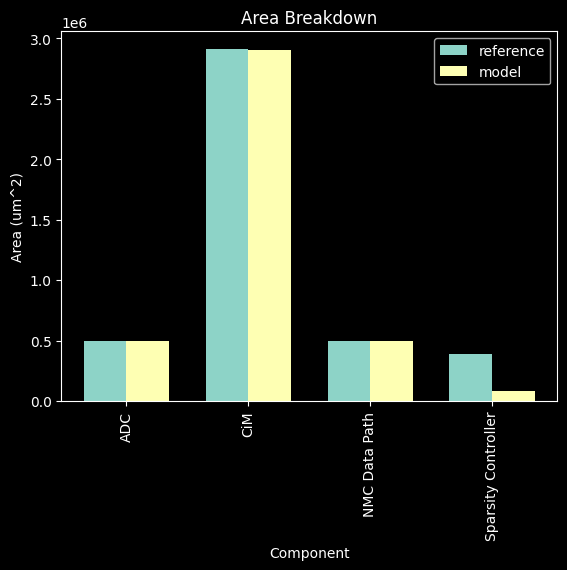

In [2]:
result = run_test("jia_jssc_2020", "test_area_breakdown")
bar_side_by_side(
    result[0].get_compare_ref_area(),
    xlabel="Component",
    ylabel="Area (um^2)",
    title="Area Breakdown",
)


   ### Energy Breakdown

   This test replicates the results of Table I in the paper.

   We show the area and energy of the macro at 0.85V and 1.2V power supplies
   using 1b inputs and weights. We will report the energy of the ADC, CiM,
   and NMC data path.

   We see that increasing the voltage from 0.85V to 1.2V increases the energy
   consumption of each component of the macro.
   

100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


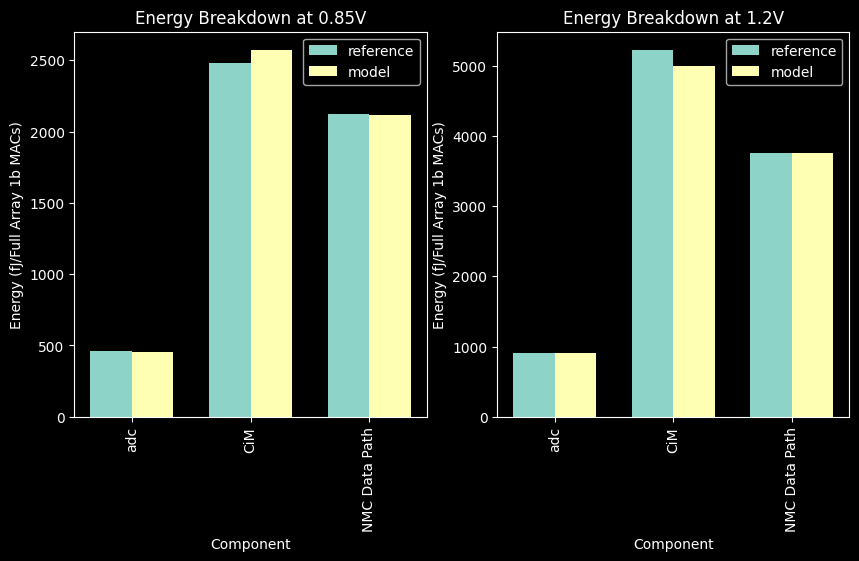

In [3]:
result = run_test("jia_jssc_2020", "test_energy_breakdown")
fig, ax = plt.subplots(1, len(result), figsize=(10, 5))
for i, r in enumerate(result):
    bar_side_by_side(
        r.get_compare_ref_energy(),
        xlabel="Component",
        ylabel="Energy (pJ/Full Array 1b MACs)",
        title=f"Energy Breakdown at {r.variables['VOLTAGE']}V",
        ax=ax[i],
    )
plt.show()


   ### Energy Efficiency, Throughput, and Compute Density

   This test replicates the results of Table II in the paper.

   We show the area, energy efficiency, and throughput of the macro at 0.85V
   and 1.2V power supplies using 1b inputs and weights.

   We see that increasing the voltage from 0.85V to 1.2V increases throughput
   and compute density at the cost of increased the energy consumption.

   Modeled compute density is higher than reported because we did not model
   the area of the control logic that manages the sparsity controller.
   

100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


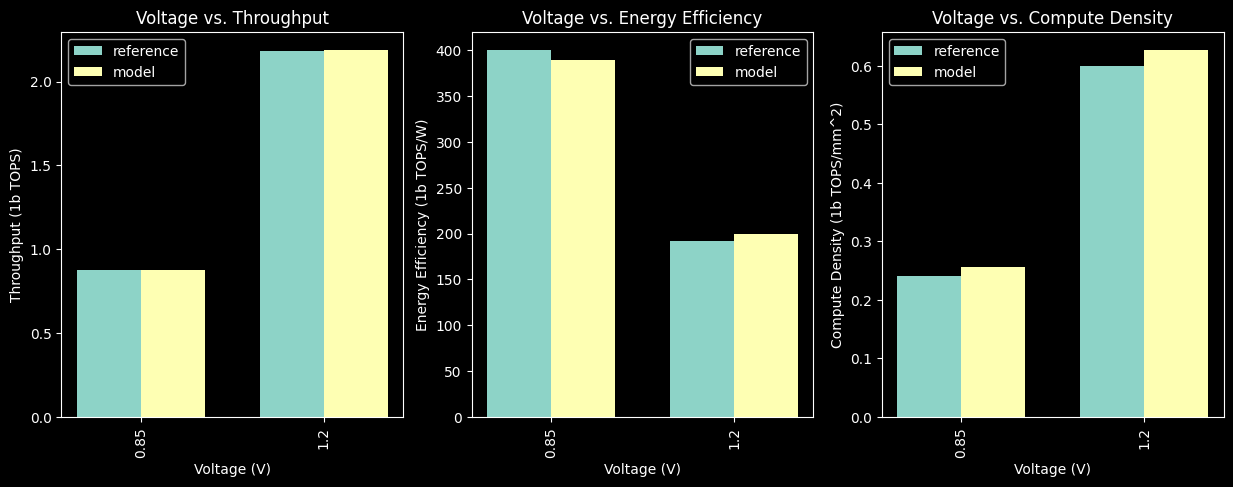

In [4]:
result = run_test("jia_jssc_2020", "test_tops")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
bar_side_by_side(
    {r.variables["VOLTAGE"]: r.tops_1b for r in result},
    xlabel="Voltage (V)",
    ylabel="Throughput (1b TOPS)",
    title="Voltage vs. Throughput",
    ax=ax[0],
)
bar_side_by_side(
    {r.variables["VOLTAGE"]: r.tops_per_w_1b for r in result},
    xlabel="Voltage (V)",
    ylabel="Energy Efficiency (1b TOPS/W)",
    title="Voltage vs. Energy Efficiency",
    ax=ax[1],
)
bar_side_by_side(
    {r.variables["VOLTAGE"]: r.tops_per_mm2_1b for r in result},
    xlabel="Voltage (V)",
    ylabel="Compute Density (1b TOPS/mm^2)",
    title="Voltage vs. Compute Density",
    ax=ax[2],
)


   ### Throughput versus Number of Input and Weight Bits

   This test replicates the results of Fig. 10 C_cimu in the paper.

   We show the area and throughput of the macro with 1, 2, 4, and 8b inputs
   and weights. For each configuration, we measure the throughput of the macro
   in TOPS.

   We see that the this macro can flexibly trade off bit precision and
   throughput. It does so by computing with 1b slices of inputs and
   weights, then shifting + adding together results from a variable number of
   slices. Each input slice is processed in a different timestep, so fewer
   (more) input slices will decrease (increase) latency. Each weight slice is
   stored in a different column, so fewer (more) weight slices will decrease
   (increase) storage density.

   There is a slight discrepancy at the highest-bitwidth result, where the
   throughput of the published macro decreases more than expected. This is
   due to bottlenecks in the published macro's memory hierarchy.
   

100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


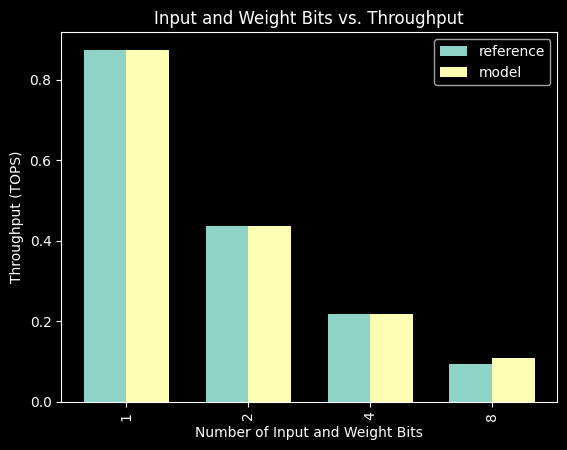

In [5]:
result = run_test("jia_jssc_2020", "test_tops_bits_scaling")
bar_side_by_side(
    {r.variables["INPUT_BITS"]: r.tops for r in result},
    xlabel="Number of Input and Weight Bits",
    ylabel="Throughput (TOPS)",
    title="Input and Weight Bits vs. Throughput",
)


   ### Exploration of Column Folding versus DNN Energy Efficiency

   This test explores how the macro's column folding strategy impacts the
   energy efficiency and throughput of a DNN. Column folding connects columns
   together to share outputs, rather than inputs as is done in non-folded
   columns.

   We can see that, as the number of folded columns increases, the energy due
   to output processing (column readout, ADC) decreases because folding columns
   increases output reuse and allows output readout circuitry energy to be
   amortized across more computations (*e.g.,* one ADC can read the results
   from more than column at a time instead of just one). However, the energy
   due to input processing (DAC, row drivers) increases because amount of
   input reuse decreases leading to more DAC converts and input driver
   activations.
   

100%|██████████| 168/168 [00:41<00:00,  4.05it/s]


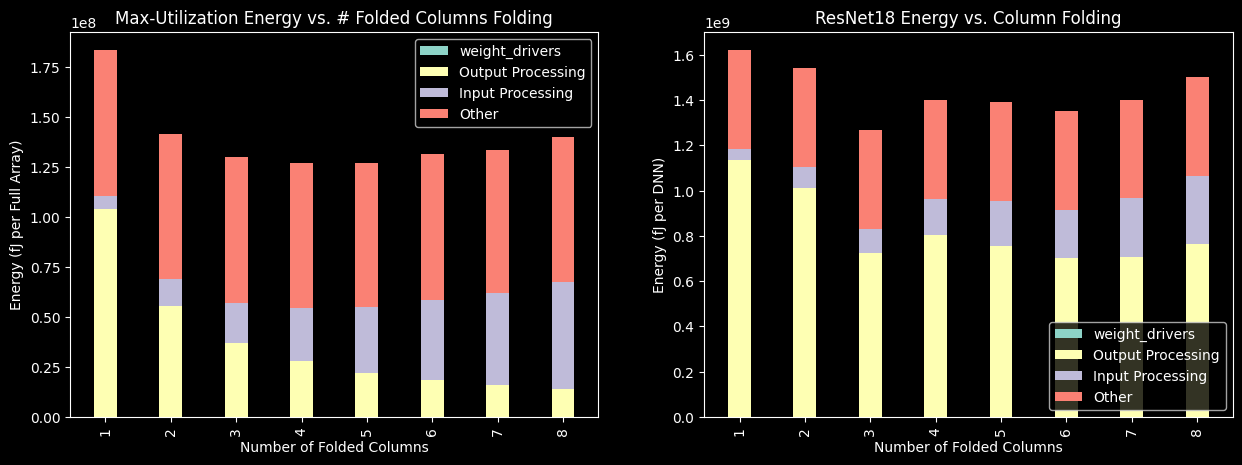

In [6]:
result_max_util = run_test(
    "jia_jssc_2020", "test_column_folding_dnn", dnn_name="max_utilization"
)
result_resnet18 = run_test(
    "jia_jssc_2020", "test_column_folding_dnn", dnn_name="resnet18", show_doc=False
)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
bar_stacked(
    {r.variables["N_FOLDED_COLUMNS"]: r.energy for r in result_max_util},
    xlabel="Number of Folded Columns",
    ylabel="Energy (pJ per Full Array)",
    title="Max-Utilization Energy vs. # Folded Columns Folding",
    ax=ax[0],
)
bar_stacked(
    {r.variables["N_FOLDED_COLUMNS"]: r.energy for r in result_resnet18},
    xlabel="Number of Folded Columns",
    ylabel="Energy (pJ per DNN)",
    title="ResNet18 Energy vs. Column Folding",
    ax=ax[1],
    legend_loc="lower right",
)